In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
JPAS=pd.read_excel('../j-pas/tracers.xlsx',header=0,index_col=0)
DESI=pd.read_excel('../desi/tracers.xlsx',header=0,index_col=0)

In [3]:
z_min=np.array([0.6,0.8,1.0,1.2,1.4,1.6,2.0])
z_max=np.array([0.8,1.0,1.2,1.4,1.6,2.0,2.4])
zz=(z_min+z_max)/2
PFS=np.array([1.9,6.0,5.8,7.8,5.5,3.1,2.7])*1e-4
z=np.array([0.3,0.5,0.7,0.9,1.1,1.3,1.5,1.8,2.2])

In [4]:
palette=sns.color_palette(['mediumpurple','forestgreen','orange'])
palette

[(0.5764705882352941, 0.4392156862745098, 0.8588235294117647),
 (0.13333333333333333, 0.5450980392156862, 0.13333333333333333),
 (1.0, 0.6470588235294118, 0.0)]

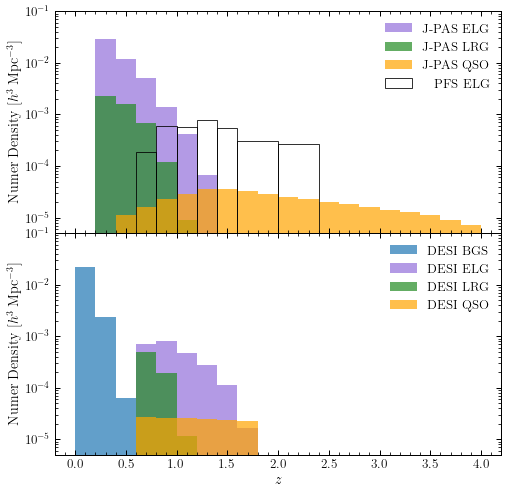

In [17]:
sns.set_context('paper',font_scale=1.5)
sns.set_palette(palette)
fig,axes=plt.subplots(2,1,sharex=True)
fig.set_dpi(72)
fig.subplots_adjust(hspace=0)
fig.set_size_inches(8,8)
axes[0].bar(JPAS.index,JPAS['ELG'],width=0.2,alpha=0.7,label=r'J-PAS ELG')
axes[0].bar(JPAS.index,JPAS['LRG'],width=0.2,alpha=0.7,label=r'J-PAS LRG')
axes[0].bar(JPAS.index,JPAS['QSO'],width=0.2,alpha=0.7,label=r'J-PAS QSO')
axes[0].bar(zz,PFS,width=(z_max-z_min),ls='-',edgecolor='k',facecolor='none',label=r'PFS ELG')
axes[0].set_ylim(5e-6,1e-1)
axes[1].bar(DESI.index,DESI['BGS'],width=0.2,alpha=0.7,label=r'DESI BGS',color='#1F77B4')
axes[1].bar(DESI.index,DESI['ELG'],width=0.2,alpha=0.7,label=r'DESI ELG',color=palette[0])
axes[1].bar(DESI.index,DESI['LRG'],width=0.2,alpha=0.7,label=r'DESI LRG',color=palette[1])
axes[1].bar(DESI.index,DESI['QSO'],width=0.2,alpha=0.7,label=r'DESI QSO',color=palette[2])
axes[1].set_ylim(5e-6,1e-1)
axes[1].set_xlabel(r'$z$')
legend=axes[0].legend(loc='upper right',frameon=False)
legend.get_texts()[-1].set_position((12,0))
axes[1].legend(loc='upper right',frameon=False)
for ax in axes:
    ax.set_yscale('log')
    ax.set_ylabel(r'Numer Density [$h^3\;\mathrm{Mpc^{-3}}$]')
    ax.minorticks_on()
    ax.tick_params(which='both',direction='in',right=True,top=True)

In [18]:
fig.savefig('density.pdf',bbox_inches='tight')